<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><strong>Joint Project with SQL - Part II<strong>
***
DAT-5303 | Machine Learning<br>
<strong>Team 12</strong><br>
Christine Drejer Jakobsen – 10817232<br>
Eyra Urrutia – 19971343<br>
Marius Heje Maehle – 9822577<br>
Shlok Bhurke – 11006936
<br> Student of Business Analytics<br>
Hult International Business School<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<strong>Contents<strong><br>
1) Case introduction<br>
2) Actionable key insights<br>
3) Base model confusion matrix<br>
4) Classification model<br>
5) Principal component analysis and k-means clustering<br>
6) Unsupervised learning<br>
7) Data visualization 1: Correlation Heatmap<br>
8) Data visualization 2: PCA Scree Plot <br>
9) Data visualization 3: Dendrogram<br>
10) Conclusion
<br><br>
<br><br>

<h1>Case Introduction</h1><br>
In Joint team assignment part one, we build a classifier model to classify wholesalers and personal buyers for Flora’s to help them identify the different type of target customers.

This case will first introduce actionable insights before moving to a description of our first base model confusion matrix from part one including outputs and outline potential problems the company will face putting the model into practice.

To resolve the class imbalance a new classification model has been developed, also principal component analysis and k-means clustering has been performed to provide a better a better understanding of the customers supported with data visualizations and insights. Throughout the report partial conclusion will be made from analyzing data outputs and including a conclusion summarizing the findings and recommendations. 
<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h1> Actionable Key Insights</h1><br>
A confusion matrix can help us identify the most suitable machine learning model that allow us to make required business decisions. Our model provided us with the following actionable actions: 

Flora can use the classification model to visualize important predictive analytics to classify their business and personal customers and provide direct comparison of predicted values and target their marketing campaign, and determinate the performance of classifier. 

-       With a small recall of 98% percentage Flora knows they know classification of. 

-       Flora can with a high accuracy know actually whom to call and email and engage with their existing customers in their direct marketing. In that way they can decrease the chance of confusing customers who are not eligible for Flora for Business. 

-       The high specificity value shows that the proportion of actual negatives are correct identified of the customer, where the high value of false negatives can be a result from type error II. Meaning an existing customer will be receiving a call or email with an offer for Flora Business that they are not eligible for. 

  


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />



# Part 1

In [1]:
# Importing necessary libraries
import pandas            as pd                            # Data science Essentials
import numpy             as np                            # Mathematical Essentials
import matplotlib.pyplot as plt                           # Data Visualization
import seaborn           as sns                           # Enhanced Data Visualization
from sklearn.model_selection import train_test_split      # Train-Test Split
from sklearn.linear_model import LogisticRegression       # Logistic Regression
import statsmodels.formula.api as smf                     # Logistic Modeling 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
                        #For Confusion Matrix, Accuracy Score, Recall Score and Precision Score
from sklearn.model_selection import cross_val_score       # Cross-Val Score
from sklearn.metrics import roc_auc_score                 # AUC Score
from sklearn.metrics import make_scorer                   # Customizable Scorer
from sklearn.neighbors import KNeighborsClassifier        # KNN Classification
from sklearn.neighbors import KNeighborsRegressor         # KNN Regression
from sklearn.preprocessing import StandardScaler          # Standard Scaler
from sklearn.tree import DecisionTreeClassifier           # Classification Trees
from sklearn.tree import plot_tree                        # Tree Plots
from sklearn.ensemble import RandomForestClassifier       # Random Forest
from sklearn.ensemble import GradientBoostingClassifier   # GBM
from sklearn.model_selection import GridSearchCV          # Hyperparameter Tuning
from sklearn.decomposition   import PCA                   # PCA
from sklearn.preprocessing   import StandardScaler        # Standard Scaler
from scipy.cluster.hierarchy import dendrogram, linkage   # Dendrogram
from sklearn.cluster         import KMeans                # K-means clustering


# Setting print options for Pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Specifying File path
file = './Team12_export.csv'


# Reading the CSV file through Pandas
clients = pd.read_csv(filepath_or_buffer = file,
                      sep = ',',
                      header = 0)


# Displaying first two rows to verify successful file read
clients.head(n = 2)

,Customer_ID,Age,Sex,Occupation,Educational_Qualifications,Employment_type,Marital_Status,Household_Relationship,Country,Race,Total_Number_of_Orders,Average_length_of_invoice,Invoice_Total,Average_of_Total_of_Invoice,Customer_Type
0,1787912,65,M,Farming-fishing,HS-grad,Self-emp-not-inc,Married-civ-spouse,Husband,United-States,White,28,3.8214,115.73,4.133214,Not Defined
1,5957969,66,M,Other-service,Bachelors,Private,Married-civ-spouse,Husband,United-States,White,14,7.5000,111.75,7.982143,Not Defined


In [2]:
# Getting Dataset dimensions of Client's database
print(f"""
Size of Clients Dataset
------------------------
Observations: {clients.shape[0]}
Features:     {clients.shape[1]}
""")


Size of Clients Dataset
------------------------
Observations: 4018
Features:     15



In [3]:
# Getting the number of clients which need to be Predicted (where their type is 'Not Defined')
clients_predict = clients.loc[clients['Customer_Type']=='Not Defined']

print(f"""
Size of Clients to Predict
----------------------------------------
Observations: {clients_predict.shape[0]}
Features:     {clients_predict.shape[1]}
""")


# Getting the number of clients which are already classified (where their type is defined)
clients_wp = clients.loc[clients['Customer_Type']!='Not Defined']

print(f"""
Size of Clients which are classify already 
-----------------------------------------
Observations: {clients_wp.shape[0]}
Features:     {clients_wp.shape[1]}
""")


Size of Clients to Predict
----------------------------------------
Observations: 3050
Features:     15


Size of Clients which are classify already 
-----------------------------------------
Observations: 968
Features:     15



In [4]:
# Cleaning Occupation feature by replacing values
clients_clean = clients_wp
clients_clean.loc[:,'Occupation'] = clients_clean['Occupation'].replace(['Farming-fishing','Protective-serv',
                                                                  'Priv-house-serv','Armed-Forces'],
                                                                  'Other-service')

# Printing value counts for Occupation column
print(clients_clean['Occupation'].value_counts())

Prof-specialty       185
Other-service        147
Craft-repair         118
Sales                111
Adm-clerical         103
Exec-managerial      101
Machine-op-inspct     70
Handlers-cleaners     45
Transport-moving      44
Tech-support          44
Name: Occupation, dtype: int64


/Users/shlokbhurke/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [5]:
# Cleaning Educational_Qualifications feature by replacing values
clients_clean.loc[:,'Educational_Qualifications'] = clients_clean['Educational_Qualifications'].replace(['10th','7th-8th','Prof-school',
                                                                 '9th','Doctorate','5th-6th', '12th',
                                                                 '1st-4th','Preschool'],'Other-education')

# Printing value counts for Educational_Qualifications column
print(clients_clean['Educational_Qualifications'].value_counts())

HS-grad            322
Some-college       209
Bachelors          160
Other-education    115
Masters             49
Assoc-voc           44
11th                35
Assoc-acdm          34
Name: Educational_Qualifications, dtype: int64


In [6]:
# Cleaning Marital_Status feature by replacing values
clients_clean.loc[:,'Marital_Status'] = clients_clean['Marital_Status'].replace(['Widowed','Married-spouse-absent'],
                                                                  'Other-marital_status')

# Printing value counts for Marital_Status column
print(clients_clean['Marital_Status'].value_counts())

Married-civ-spouse      456
Never-married           327
Divorced                117
Other-marital_status     36
Separated                32
Name: Marital_Status, dtype: int64


In [7]:
# Cleaning Country feature by replacing values
clients_clean.loc[:,'Country'] = clients_clean['Country'].replace(['Mexico', 'Cuba','Philippines',
                                                                   'Canada','El-Salvador','Jamaica', 
                                                                   'Puerto-Rico','Nicaragua','Italy',
                                                                   'India','Poland','Hong', 'Ecuador',
                                                                   'Haiti','Japan','Iran','Vietnam','Germany',
                                                                   'Guatemala','South','England','China',
                                                                   'Portugal','Scotland','Taiwan','France',
                                                                   'Hungary','Dominican-Republic'],'Other-country')

# Printing value counts for Country column
print(clients_clean['Country'].value_counts())

United-States    893
Other-country     75
Name: Country, dtype: int64


In [8]:
# Cleaning Race feature by replacing values
clients_clean.loc[:,'Race'] = clients_clean['Race'].replace(['Asian-Pac-Islander','Other',
                                                             'Amer-Indian-Eskimo'],'Other-race')

# Printing value counts for Race column
print(clients_clean['Race'].value_counts())

White         839
Black          79
Other-race     50
Name: Race, dtype: int64


In [9]:
# Dropping columns Customer_ID and Age after cleaning data
clients_clean = clients_clean.drop(['Customer_ID','Age'], axis = 1)

In [10]:
# Getting dummy variables for Categorical variables
clients_dummies = pd.get_dummies(clients_clean, drop_first=True)
clients_dummies.head(n = 2)

,Total_Number_of_Orders,Average_length_of_invoice,Invoice_Total,Average_of_Total_of_Invoice,Sex_M,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Prof-specialty,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Educational_Qualifications_Assoc-acdm,Educational_Qualifications_Assoc-voc,Educational_Qualifications_Bachelors,Educational_Qualifications_HS-grad,Educational_Qualifications_Masters,Educational_Qualifications_Other-education,Educational_Qualifications_Some-college,Employment_type_Local-gov,Employment_type_Private,Employment_type_Self-emp-inc,Employment_type_Self-emp-not-inc,Employment_type_State-gov,Marital_Status_Married-civ-spouse,Marital_Status_Never-married,Marital_Status_Other-marital_status,Marital_Status_Separated,Household_Relationship_Not-in-family,Household_Relationship_Other-relative,Household_Relationship_Own-child,Household_Relationship_Unmarried,Household_Relationship_Wife,Country_United-States,Race_Other-race,Race_White,Customer_Type_Wholesaler
4,254,15.0276,1791.78,7.054252,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
6,107,12.4953,892.35,8.339720,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1


In [11]:
# Dropping column Customer_Type_Wholesaler from Client_dummies dataset
x = clients_dummies.drop(['Customer_Type_Wholesaler'], axis = 1)
y = clients_dummies['Customer_Type_Wholesaler']

# Splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 219, stratify = y)

#Printing dimensions for training dataset
print(f"""\
Size of for Training
-----------------------------------------
Observations: {x_train.shape[0]}
Features:     {x_train.shape[1]}
""")

#Printing dimensions for testing dataset
clients_wp = clients.loc[clients['Customer_Type']!='Not Defined']
print(f"""
Size of Test
-----------------------------------------
Observations: {x_test.shape[0]}
Features:     {x_test.shape[1]}
""")

Size of for Training
-----------------------------------------
Observations: 726
Features:     38


Size of Test
-----------------------------------------
Observations: 242
Features:     38



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2> Base Model Confusion Matrix</h2><br>
In the base model’s confusion matrix, we are calculating the classification accuracy between the following variables: Occupation, Educational qualifications, Employment type, Marital Status, Country, Race, Customer ID, Age. <br>
<br>
The confusion matrix is showing us where the algorithm correctly classifies the customers and where it made the errors while classifying them. Customers with “customer id” = 0 were excluded as there was sufficient personal information, so only customer who made purchases are included.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [12]:
# Using Logistic Regresssion
logreg = LogisticRegression()

logreg_fit = logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

# Storing train & test score, & train-test gap
logreg_train_score = logreg.score(x_train, y_train).round(4)
logreg_test_score  = logreg.score(x_test, y_test).round(4)
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

# Printing Training and testing score with gap
print('Training Score:', logreg_train_score)
print('Testing Score :', logreg_test_score)
print('Logistic Regression Train-Test Gap :', logreg_test_gap, '\n', 75*'-')

# Creating confusion matrix for testing dataset
# Segregating the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# Printing each element in Confusion Matrix one-by-one with repective label
print(f"""
True Negatives  : {logreg_tn}
False Positives : {logreg_fp}
False Negatives : {logreg_fn}
True Positives  : {logreg_tp}
""")


# Getting Accuracy, Recall and Prescision score for testing dataset
print(f"""Accuracy Score  :   {round(accuracy_score(y_test, y_pred),2)}
Recall Score    :   {round(recall_score(y_test, y_pred), 2)}
Precision Score :   {round(precision_score(y_test, y_pred),2)}
""")

/Users/shlokbhurke/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.8361
Testing Score : 0.814
Logistic Regression Train-Test Gap : 0.0221 
 ---------------------------------------------------------------------------

True Negatives  : 0
False Positives : 42
False Negatives : 3
True Positives  : 197

Accuracy Score  :   0.81
Recall Score    :   0.98
Precision Score :   0.82



Testing data:

On the testing data there were 197 that were predicted correct, with 0 of them positives, and 197 negatives. Whereas the number of incorrect predictions for each class was 45, with 42 false positive and 3 false negative. 

In [13]:
# Creating confusion matrix for training dataset
logreg_fit = logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_train)

logreg_train_score = logreg.score(x_train, y_train).round(4)
logreg_test_score  = logreg.score(x_test, y_test).round(4)
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

# Creating confusion matrix for training dataset
# Segregating the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_train, y_pred = y_pred).ravel()


# Printing each element in Confusion Matrix one-by-one with repective label
print(f"""
True Negatives  : {logreg_tn}
False Positives : {logreg_fp}
False Negatives : {logreg_fn}
True Positives  : {logreg_tp}
""")


# Getting Accuracy, Recall and Prescision score for training dataset
print(f"""Accuracy Score  :   {round(accuracy_score(y_train, y_pred),2)}
Recall Score    :   {round(recall_score(y_train, y_pred), 2)}
Precision Score :   {round(precision_score(y_train, y_pred),2)}
""")


True Negatives  : 14
False Positives : 114
False Negatives : 5
True Positives  : 593

Accuracy Score  :   0.84
Recall Score    :   0.99
Precision Score :   0.84



/Users/shlokbhurke/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data: 

On the training data there were 607 that were predicted correct, with 14 of them positives, and 593 negatives. Whereas the number of incorrect predictions for each class was 119, with 115 false positive and 4 false negative.

Problems: 

The problems the company would face is that the model is incorrectly predicting some of the customers which can be a limitation for the company in how reliable the model is. For example, if they want to do A/B Testing on the customer behavior or click-through ad rate predictions, they could not be as accurate as wished to get actionable insights from the data. 

In [14]:
# Replacing values
clients_predict.loc[:,'Occupation'] = clients_predict['Occupation'].replace(['Farming-fishing','Protective-serv',
                                                                  'Priv-house-serv','Armed-Forces'],
                                                                  'Other-service')
clients_predict.loc[:,'Educational_Qualifications'] = clients_predict['Educational_Qualifications'].replace(['10th','7th-8th','Prof-school',
                                                                 '9th','Doctorate','5th-6th', '12th',
                                                                 '1st-4th','Preschool'],'Other-education')
clients_predict.loc[:,'Employment_type'] = clients_predict['Employment_type'].replace(['Without-pay'],
                                                                                            'Private')
clients_predict.loc[:,'Marital_Status'] = clients_predict['Marital_Status'].replace(['Widowed','Married-spouse-absent','Married-AF-spouse'],
                                                                  'Other-marital_status')
clients_predict.loc[:,'Country'] = clients_predict['Country'].replace(['Mexico', 'Cuba','Philippines',
                                                                   'Canada','El-Salvador','Jamaica', 
                                                                   'Puerto-Rico','Nicaragua','Italy',
                                                                   'India','Poland','Hong', 'Ecuador',
                                                                   'Haiti','Japan','Iran','Vietnam','Germany',
                                                                   'Guatemala','South','England','China',
                                                                   'Portugal','Scotland','Taiwan','France',
                                                                   'Hungary','Dominican-Republic','Columbia',
                                                                'Holand-Netherlands','Honduras','Ireland',
                                                                    'Outlying-US(Guam-USVI-etc)','Peru','Thailand',
                                                                      'Yugoslavia','Cambodia'],'Other-country')
clients_predict.loc[:,'Race'] = clients_predict['Race'].replace(['Asian-Pac-Islander','Other',
                                                             'Amer-Indian-Eskimo'],'Other-race')

# Dropping columns
clients_predict = clients_predict.drop(['Customer_ID','Age'], axis = 1)
clients_predict = pd.get_dummies(clients_predict, drop_first=True)

# Printing first 2 rows of clients_predict
clients_predict.head(n = 2)

/Users/shlokbhurke/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Total_Number_of_Orders,Average_length_of_invoice,Invoice_Total,Average_of_Total_of_Invoice,Sex_M,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Prof-specialty,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Educational_Qualifications_Assoc-acdm,Educational_Qualifications_Assoc-voc,Educational_Qualifications_Bachelors,Educational_Qualifications_HS-grad,Educational_Qualifications_Masters,Educational_Qualifications_Other-education,Educational_Qualifications_Some-college,Employment_type_Local-gov,Employment_type_Private,Employment_type_Self-emp-inc,Employment_type_Self-emp-not-inc,Employment_type_State-gov,Marital_Status_Married-civ-spouse,Marital_Status_Never-married,Marital_Status_Other-marital_status,Marital_Status_Separated,Household_Relationship_Not-in-family,Household_Relationship_Other-relative,Household_Relationship_Own-child,Household_Relationship_Unmarried,Household_Relationship_Wife,Country_United-States,Race_Other-race,Race_White
0,28,3.8214,115.73,4.133214,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
1,14,7.5000,111.75,7.982143,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [15]:
# Performing Logarithm regression prediction
clients_predict['prediction'] = pd.DataFrame(logreg.predict(clients_predict))

# Printing first 10 rows of clients_predict
print("1.0 denotes Wholesale clients | 0 denotes Personal clients in Predition column")
clients_predict.head(n = 10)

1.0 denotes Wholesale clients | 0 denotes Personal clients in Predition column


,Total_Number_of_Orders,Average_length_of_invoice,Invoice_Total,Average_of_Total_of_Invoice,Sex_M,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Prof-specialty,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Educational_Qualifications_Assoc-acdm,Educational_Qualifications_Assoc-voc,Educational_Qualifications_Bachelors,Educational_Qualifications_HS-grad,Educational_Qualifications_Masters,Educational_Qualifications_Other-education,Educational_Qualifications_Some-college,Employment_type_Local-gov,Employment_type_Private,Employment_type_Self-emp-inc,Employment_type_Self-emp-not-inc,Employment_type_State-gov,Marital_Status_Married-civ-spouse,Marital_Status_Never-married,Marital_Status_Other-marital_status,Marital_Status_Separated,Household_Relationship_Not-in-family,Household_Relationship_Other-relative,Household_Relationship_Own-child,Household_Relationship_Unmarried,Household_Relationship_Wife,Country_United-States,Race_Other-race,Race_White,prediction
0,28,3.8214,115.73,4.133214,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1.0
1,14,7.5000,111.75,7.982143,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.0
2,92,13.2826,783.24,8.513478,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1.0
3,14,4.6429,100.62,7.187143,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1.0
5,19,10.0000,297.70,15.668421,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.0
8,1,1.0000,-3.95,-3.950000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1.0
9,164,12.1524,2032.16,12.391220,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.0
10,1026,30.2788,34397.52,33.525848,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1.0
11,12,3.8333,369.78,30.815000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.0
13,12,6.5000,160.47,13.372500,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1.0


# Part 2

## Classification Model

In [16]:
# Defining required UDFs for CLASSIFICATION MODEL

########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df        

        
########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [17]:
# Checking Null values in result dataframe from Part 1 i.e. clients_predict 
clients_predict.isnull().any(axis = 0).any()

True

In [18]:
# Running the mv_flagger function
clients_predict = mv_flagger(df = clients_predict)

In [19]:
# Filling Null values with 'unknown_prediction'
clients_predict["prediction"] = clients_predict["m_prediction"].fillna('unknown_prediction')

In [20]:
# Verifying for Null values
clients_predict["prediction"].isnull().any()

False

In [21]:
# Dropping column created by mvflagger
clients_predict = clients_predict.drop("m_prediction", axis = 1)

In [22]:
# Getting Value counts for Prediction column
clients_predict.loc[ : ,'prediction'].value_counts(normalize = True).round(decimals = 2)

0    0.76
1    0.24
Name: prediction, dtype: float64

In [23]:
# Renaming columns with hyphen (-) in the column name to avoid errors during Logistic Regression modeling
clients_predict_pd = pd.DataFrame(clients_predict)
clients_predict_pd.rename(columns = {'Occupation_Craft-repair':'Occupation_Craft_repair', 
                                     'Occupation_Exec-managerial':'Occupation_Exec_managerial',
                                     'Occupation_Handlers-cleaners':'Occupation_Handlers_cleaners',
                                     'Occupation_Machine-op-inspct':'Occupation_Machine_op_inspct',
                                     'Occupation_Other-service':'Occupation_Other_service',
                                     'Occupation_Prof-specialty':'Occupation_Prof_specialty',
                                     'Occupation_Tech-support':'Occupation_Tech_support',
                                     'Occupation_Transport-moving':'Occupation_Transport_moving',
                                     'Educational_Qualifications_Assoc-acdm':'Educational_Qualifications_Assoc_acdm',
                                     'Educational_Qualifications_Assoc-voc':'Educational_Qualifications_Assoc_voc',
                                     'Educational_Qualifications_HS-grad':'Educational_Qualifications_HS_grad',
                                     'Educational_Qualifications_Other-education':'Educational_Qualifications_Other_education',
                                     'Educational_Qualifications_Some-college':'Educational_Qualifications_Some_college',
                                     'Employment_type_Local-gov':'Employment_type_Local_gov',
                                     'Employment_type_Self-emp-inc':'Employment_type_Self_emp_inc',
                                     'Employment_type_Self-emp-not-inc':'Employment_type_Self_emp_not_inc',
                                     'Employment_type_State-gov':'Employment_type_State_gov',
                                     'Marital_Status_Married-civ-spouse':'Marital_Status_Married_civ_spouse',
                                     'Marital_Status_Never-married':'Marital_Status_Never_married',
                                     'Household_Relationship_Not-in-family':'Household_Relationship_Not_in_family',
                                     'Household_Relationship_Other-relative':'Household_Relationship_Other_relative',
                                     'Marital_Status_Other-marital_status':'Marital_Status_Other_marital_status',
                                     'Household_Relationship_Own-child':'Household_Relationship_Own_child',
                                     'Country_United-States':'Country_UnitedStates',
                                     'Race_Other-race':'Race_Other_race'},
                          inplace = True)
   
# Changing original dataset with renamed columns
clients_predict = clients_predict_pd

In [24]:
# Creating explanatory variable (x)
clients_predict_data = clients_predict.drop('prediction', axis = 1)

# Declaring response variable (y)
clients_predict_target = clients_predict.loc[ : , 'prediction']

In [25]:
# Train-Test split w/ stratification
x_train, x_test, y_train, y_test = train_test_split(
            clients_predict_data,
            clients_predict_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = clients_predict_target) # preserving balance


# Merging training data
clients_predict_train = pd.concat([x_train, y_train], axis = 1)

In [26]:
# Printing Variable proportions for Training and Testing set
print(f"""\
--------------------------------------------
Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}

--------------------------------------------
Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")

--------------------------------------------
Response Variable Proportions (Training Set)
--------------------------------------------
0    0.76
1    0.24
Name: prediction, dtype: float64

--------------------------------------------
Response Variable Proportions (Testing Set)
--------------------------------------------
0    0.76
1    0.24
Name: prediction, dtype: float64



### Logistic Regression

In [27]:
# Starting Logistic Regression model object
logistic_small = smf.logit(formula = "prediction ~ Total_Number_of_Orders",
                           data    = clients_predict_train)


# Fitting to the model object
results_logistic = logistic_small.fit()


# Summary of the results
print(results_logistic.summary2())

Optimization terminated successfully.
         Current function value: 0.554141
         Iterations 6
                            Results: Logit
Model:                 Logit              Pseudo R-squared:   0.001    
Dependent Variable:    prediction         AIC:                3046.2360
Date:                  2022-04-07 21:11   BIC:                3058.0711
No. Observations:      2745               Log-Likelihood:     -1521.1  
Df Model:              1                  LL-Null:            -1522.1  
Df Residuals:          2743               LLR p-value:        0.16122  
Converged:             1.0000             Scale:              1.0000   
No. Iterations:        6.0000                                          
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept              -1.1080   0.0501 -22.1158 0.0000 -1.2062

In [28]:
# Full Logistic model 
logistic_full = smf.logit(formula = """prediction ~  Total_Number_of_Orders + 
                                                     Average_length_of_invoice + 
                                                     Invoice_Total + 
                                                     Average_of_Total_of_Invoice + 
                                                     Sex_M + 
                                                     Occupation_Craft_repair + 
                                                     Occupation_Exec_managerial + 
                                                     Occupation_Handlers_cleaners + 
                                                     Occupation_Machine_op_inspct + 
                                                     Occupation_Other_service + 
                                                     Occupation_Prof_specialty + 
                                                     Occupation_Sales + 
                                                     Occupation_Tech_support + 
                                                     Occupation_Transport_moving + 
                                                     Educational_Qualifications_Assoc_acdm + 
                                                     Educational_Qualifications_Assoc_voc + 
                                                     Educational_Qualifications_Bachelors + 
                                                     Educational_Qualifications_HS_grad + 
                                                     Educational_Qualifications_Masters + 
                                                     Educational_Qualifications_Other_education + 
                                                     Educational_Qualifications_Some_college + 
                                                     Employment_type_Local_gov + 
                                                     Employment_type_Private + 
                                                     Employment_type_Self_emp_inc + 
                                                     Employment_type_Self_emp_not_inc + 
                                                     Employment_type_State_gov + 
                                                     Marital_Status_Married_civ_spouse + 
                                                     Marital_Status_Never_married + 
                                                     Marital_Status_Other_marital_status + 
                                                     Marital_Status_Separated + 
                                                     Household_Relationship_Not_in_family + 
                                                     Household_Relationship_Other_relative + 
                                                     Household_Relationship_Own_child + 
                                                     Household_Relationship_Unmarried + 
                                                     Household_Relationship_Wife + 
                                                     Country_UnitedStates + 
                                                     Race_Other_race + 
                                                     Race_White""",
                            data = clients_predict_train)


# Fitting the model object
results_full = logistic_full.fit()

# Checking the SUMMARY of the results
print(results_full.summary2())

Optimization terminated successfully.
         Current function value: 0.546360
         Iterations 9
                                      Results: Logit
Model:                        Logit                    Pseudo R-squared:         0.015    
Dependent Variable:           prediction               AIC:                      3077.5157
Date:                         2022-04-07 21:11         BIC:                      3308.2996
No. Observations:             2745                     Log-Likelihood:           -1499.8  
Df Model:                     38                       LL-Null:                  -1522.1  
Df Residuals:                 2706                     LLR p-value:              0.21148  
Converged:                    1.0000                   Scale:                    1.0000   
No. Iterations:               9.0000                                                      
------------------------------------------------------------------------------------------
                          

In [29]:
####################### Model 1 #######################

# Starting Logistic Regression model 1 object
logit_sig = smf.logit(formula = """prediction ~ Average_of_Total_of_Invoice + 
                                                 Sex_M + 
                                                 Household_Relationship_Wife""",
                      data = clients_predict_train)


# Fitting the model object
logit_sig = logit_sig.fit()


# Summary of the results
print(logit_sig.summary2())

Optimization terminated successfully.
         Current function value: 0.552141
         Iterations 9
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.004    
Dependent Variable:     prediction           AIC:                  3039.2531
Date:                   2022-04-07 21:11     BIC:                  3062.9232
No. Observations:       2745                 Log-Likelihood:       -1515.6  
Df Model:               3                    LL-Null:              -1522.1  
Df Residuals:           2741                 LLR p-value:          0.0047555
Converged:              1.0000               Scale:                1.0000   
No. Iterations:         9.0000                                              
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Inter

In [30]:
####################### Model 2 #######################

# Starting Logistic Regression model 1 object
logit_sig = smf.logit(formula = """prediction ~ Average_of_Total_of_Invoice""",
                      data = clients_predict_train)


# Fitting the model object
logit_sig = logit_sig.fit()


# Summary of the results
print(logit_sig.summary2())

Optimization terminated successfully.
         Current function value: 0.552409
         Iterations 9
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.004     
Dependent Variable:      prediction          AIC:                 3036.7264 
Date:                    2022-04-07 21:11    BIC:                 3048.5615 
No. Observations:        2745                Log-Likelihood:      -1516.4   
Df Model:                1                   LL-Null:             -1522.1   
Df Residuals:            2743                LLR p-value:         0.00070637
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          9.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Inter

In [31]:
# Creating a dictionary to store candidate models

candidate_dict = {

 # Full model
 'logit_full'   : ['Total_Number_of_Orders', 'Average_length_of_invoice', 'Invoice_Total', 
                   'Average_of_Total_of_Invoice', 'Sex_M', 'Occupation_Craft_repair', 
                   'Occupation_Exec_managerial', 'Occupation_Handlers_cleaners', 
                   'Occupation_Machine_op_inspct', 'Occupation_Other_service', 
                   'Occupation_Prof_specialty', 'Occupation_Sales', 'Occupation_Tech_support', 
                   'Occupation_Transport_moving', 'Educational_Qualifications_Assoc_acdm', 
                   'Educational_Qualifications_Assoc_voc', 'Educational_Qualifications_Bachelors', 
                   'Educational_Qualifications_HS_grad', 'Educational_Qualifications_Masters', 
                   'Educational_Qualifications_Other_education', 'Educational_Qualifications_Some_college', 
                   'Employment_type_Local_gov', 'Employment_type_Private', 'Employment_type_Self_emp_inc', 
                   'Employment_type_Self_emp_not_inc', 'Employment_type_State_gov', 
                   'Marital_Status_Married_civ_spouse', 'Marital_Status_Never_married', 
                   'Marital_Status_Other_marital_status', 'Marital_Status_Separated',
                   'Household_Relationship_Not_in_family', 'Household_Relationship_Other_relative', 
                   'Household_Relationship_Own_child', 'Household_Relationship_Unmarried', 
                   'Household_Relationship_Wife', 'Country_UnitedStates', 'Race_Other_race', 
                   'Race_White'],
 

 # Significant variables in Model 1
 'logit_sig'    : ['Average_of_Total_of_Invoice', 'Sex_M', 'Household_Relationship_Wife'],
    
    
 # Significant variables in Model 2 
 'logit_sig_2'  : ['Average_of_Total_of_Invoice']

}

In [32]:
# Determining Target variable
clients_predict_data   =  clients_predict.loc[ : , candidate_dict['logit_sig']]
clients_predict_target =  clients_predict.loc[ : , 'prediction']


# Train-test Split
x_train, x_test, y_train, y_test = train_test_split(
            clients_predict_data,
            clients_predict_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = clients_predict_target)


# Starting Logistic Regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, warm_start = False,
                            random_state = 219)


# Fitting the training data
logreg_fit = logreg.fit(x_train, y_train)


# Predicting based on the testing set
logreg_pred = logreg_fit.predict_proba(x_test)


# Training & Testing Accuracy
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(decimals = 4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(decimals = 4))

# AUC Score
print('AUC Score               :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred[:, 1]).round(decimals = 4))

# Storing the scores
logreg_train_score = logreg_fit.score(x_train, y_train).round(decimals = 4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(decimals = 4)   # accuracy

# Storing AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred[:, 1]).round(decimals = 4)

# Printing and Storing the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(decimals = 4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(decimals = 4)

LogReg Training ACCURACY: 0.7588
LogReg Testing  ACCURACY: 0.7607
AUC Score               : 0.4642
LogReg Train-Test Gap   : 0.0019


In [33]:
# Determining Target variable
clients_predict_data   =  clients_predict.loc[ : , candidate_dict['logit_sig']]
clients_predict_target =  clients_predict.loc[ : , 'prediction']


# Train-test Split
x_train, x_test, y_train, y_test = train_test_split(
            clients_predict_data,
            clients_predict_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = clients_predict_target)


# Starting Logistic Regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, warm_start = False,
                            random_state = 219)


# Fitting the training data
logreg_fit = logreg.fit(x_train, y_train)


# Predicting based on the testing set
logreg_pred = logreg_fit.predict_proba(x_test)


# Training & Testing Accuracy
print('LogReg Training ACCURACY :', logreg_fit.score(x_train, y_train).round(decimals = 4))
print('LogReg Testing  ACCURACY :', logreg_fit.score(x_test, y_test).round(decimals = 4))

# AUC Score
print('AUC Score                :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred[:, 1]).round(decimals = 4))

# Storing the scores
logreg_train_score = logreg_fit.score(x_train, y_train).round(decimals = 4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(decimals = 4)   # accuracy

# Storing AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred[:, 1]).round(decimals = 4)

# Printing and Storing the gap between training and testing
print('LogReg Train-Test Gap    :', abs(logreg_train_score - logreg_test_score).round(decimals = 4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(decimals = 4)

LogReg Training ACCURACY : 0.7588
LogReg Testing  ACCURACY : 0.7607
AUC Score                : 0.4642
LogReg Train-Test Gap    : 0.0019


In [34]:
# Segregating the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred[:, 1].round(0).astype('int')).ravel()


# Printing each element in Confusion Matrix one-by-one with repective label
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 231
False Positives: 0
False Negatives: 73
True Positives : 1



In [35]:
# Zipping each feature name to its coefficient
logreg_model_values = zip(clients_predict[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# Setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# Printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)

### Classification Tree

In [36]:
# Starting classification tree object
full_tree = DecisionTreeClassifier()


# Fitting the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# Predicting on new data
full_tree_pred = full_tree_fit.predict_proba(x_test)


# Printing Training & Testing Accuracy
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(decimals = 4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(decimals = 4))

# Printing AUC score
print('Full Tree AUC Score        :', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred[:, 1]).round(decimals = 4))


# Storing Train and Test scores
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(decimals = 4) 
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(decimals = 4) 

# Storing AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred[:, 1]).round(decimals = 4) # auc
fulltree_test_gap = abs(full_tree_train_score - full_tree_test_score).round(decimals = 4)

# Printing Train-test gap
print('Full Tree Train-Test Gap   :', fulltree_test_gap)

Full Tree Training ACCURACY: 0.996
Full Tree Testing ACCURACY : 0.6623
Full Tree AUC Score        : 0.5552
Full Tree Train-Test Gap   : 0.3337


In [37]:
# Segregating the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred[:, 1].round(0).astype('int')).ravel()


# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 176
False Positives: 55
False Negatives: 48
True Positives : 26



In [38]:
# Starting Classification Tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 8,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# Fitting the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# Predicting on new data
tree_pruned_pred = tree_pruned_fit.predict_proba(x_test)


# Printing Training & Testing Accuracy
print('Training ACCURACY        :', tree_pruned_fit.score(x_train, y_train).round(decimals = 4))
print('Testing  ACCURACY        :', tree_pruned_fit.score(x_test, y_test).round(decimals = 4))
print('AUC Score                :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred[:, 1]).round(decimals = 4))


# Storing Train & Test score
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(decimals = 4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(decimals = 4) # accuracy


# Storing AUC score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred[:, 1]).round(decimals = 4) # auc

# Train-test gap
prunedtree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(decimals = 4)

# Prinitng Train-test gap
print('Full Tree Train-Test Gap :', prunedtree_test_gap)

Training ACCURACY        : 0.7581
Testing  ACCURACY        : 0.7508
AUC Score                : 0.4509
Full Tree Train-Test Gap : 0.0073


In [39]:
# Segregating the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred[:, 1].round(0).astype('int')).ravel()


# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 229
False Positives: 2
False Negatives: 74
True Positives : 0



In [40]:
# Comparing results
print(f"""
Model                AUC Score      TN, FP, FN, TP
-----                ---------      --------------
Logistic Regression  {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree            {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree          {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# Creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic Regression', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],
    
    'Train Test Gap'    : [logreg_test_gap, fulltree_test_gap, prunedtree_test_gap],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# Converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model                AUC Score      TN, FP, FN, TP
-----                ---------      --------------
Logistic Regression  0.4642         (231, 0, 73, 1)
Full Tree            0.5552         (176, 55, 48, 26)
Pruned Tree          0.4509         (229, 2, 74, 0)



In [41]:
# Hyperparameter Tuning

# Declaring a hyperparameter space
C_range          = np.arange(4, 20, 2)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# Creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# Starting model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 10000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = GridSearchCV(      estimator           = lr_tuned,   # the model object
                                 param_grid = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_jobs              = 250,         # number of combinations of hyperparameters to try
                                         # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# Fitting to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(x, y)


# Printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'C': 4, 'solver': 'sag', 'warm_start': True}
Tuned CV AUC      : 0.5088


In [42]:
# Building a model based on hyperparameter tuning results

# Starting Logistic Regression model with tuned values
lr_tuned = LogisticRegression(C            = 3.0000000000000004,
                              warm_start   = True,
                              solver       = 'sag',
                              max_iter     = 10000,
                              random_state = 219)


# Fitting the model to the full dataset
lr_tuned.fit(clients_predict_data, clients_predict_target) # this is ok because already tuned


# Predicting based on the testing set
lr_tuned_pred = lr_tuned.predict_proba(x_test)


# Training & Testing Accuracy and AUC score
print('LR Tuned Training ACCURACY :', lr_tuned.score(x_train, y_train).round(decimals = 4))
print('LR Tuned Testing  ACCURACY :', lr_tuned.score(x_test, y_test).round(decimals = 4))
print('LR Tuned AUC Score         :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred[:, 1]).round(decimals = 4))


# Storing scores
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(decimals = 4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(decimals = 4)   # accuracy


# Storing AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred[:, 1]).round(decimals = 4) # auc

# Train-Test gap
lrtuned_test_gap = abs(lr_tuned_train_score - lr_tuned_test_score).round(decimals = 4)
print('LR Tuned Train-Test Gap    :', lrtuned_test_gap)

LR Tuned Training ACCURACY : 0.7534
LR Tuned Testing  ACCURACY : 0.7475
LR Tuned AUC Score         : 0.5118
LR Tuned Train-Test Gap    : 0.0059


In [43]:
# Segregating the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred[:, 1].round(0).astype('int')).ravel()

# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 227
False Positives: 4
False Negatives: 73
True Positives : 1



In [44]:
# Declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(decimals = 4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(decimals = 4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred[:, 1]).round(decimals = 4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp),
                           'Train Test Gap'   : lrtuned_test_gap},
                           ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic Regression,0.4642,0.7588,0.7607,0.0019,"(231, 0, 73, 1)"
1,Full Tree,0.5552,0.9960,0.6623,0.3337,"(176, 55, 48, 26)"
2,Pruned Tree,0.4509,0.7581,0.7508,0.0073,"(229, 2, 74, 0)"
3,Tuned LR,0.5118,0.7534,0.7475,0.0059,"(227, 4, 73, 1)"


### KNN Classifier

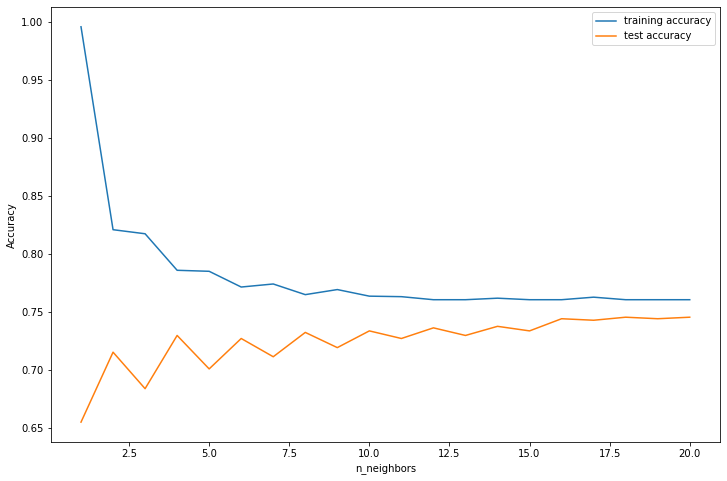

The optimal number of neighbors is: 18


In [45]:
# Optimal Neighbors
opt_neighbors = optimal_neighbors(x_data        = clients_predict_data,
                                  y_data        = clients_predict_target,
                                  response_type = 'class')

In [46]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(clients_predict_data)

# TRANSFORMING the data
x_scaled     = scaler.transform(clients_predict_data)

# Converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 

# Train-Test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            clients_predict_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = clients_predict_target)

# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)

# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)

# PREDICTING based on the testing set
knn_pred = knn_fit.predict_proba(x_test_scaled)

# SCORING the results
print('Training ACCURACY    :', knn_fit.score(x_train_scaled, y_train_scaled).round(decimals = 4))
print('Testing  ACCURACY    :', knn_fit.score(x_test_scaled, y_test_scaled).round(decimals = 4))
print('AUC Score            :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred[:, 1]).round(decimals = 4))

# Saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(decimals = 4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(decimals = 4)

# Train-Test gap
knn_test_gap = abs(knn_train_score - knn_test_score).round(decimals = 4)

# Printing Train-Test gap
print('KNN Train-Test Gap   :', knn_test_gap)

# Saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred[:, 1]).round(decimals = 4)

Training ACCURACY    : 0.7566
Testing  ACCURACY    : 0.7574
AUC Score            : 0.4843
KNN Train-Test Gap   : 0.0008


In [47]:
# Segregating the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred[:, 1].round(0).astype('int')).ravel()

# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")


True Negatives : 231
False Positives: 0
False Negatives: 74
True Positives : 0



In [48]:
# Declaring model performance objects
knn_train_acc = knn_fit.score(x_train_scaled, y_train_scaled).round(decimals = 4)
knn_test_acc  = knn_fit.score(x_test_scaled, y_test_scaled).round(decimals = 4)
knn_auc       = roc_auc_score(y_true  = y_test,
                              y_score = knn_pred[:, 1]).round(decimals = 4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'KNN Classifier',
                           'Training Accuracy' : knn_train_acc,
                           'Testing Accuracy'  : knn_test_acc,
                           'AUC Score'         : knn_auc,
                           'Confusion Matrix'  : (knn_tn,
                                                  knn_fp,
                                                  knn_fn,
                                                  knn_tp),
                           'Train Test Gap'    : knn_test_gap},
                           ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic Regression,0.4642,0.7588,0.7607,0.0019,"(231, 0, 73, 1)"
1,Full Tree,0.5552,0.9960,0.6623,0.3337,"(176, 55, 48, 26)"
2,Pruned Tree,0.4509,0.7581,0.7508,0.0073,"(229, 2, 74, 0)"
3,Tuned LR,0.5118,0.7534,0.7475,0.0059,"(227, 4, 73, 1)"
4,KNN Classifier,0.4843,0.7566,0.7574,0.0008,"(231, 0, 74, 0)"


In [49]:
##### Building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 5,
                                    max_depth        = 8,               # Max-depth as 8
                                    criterion        = 'gini',
                                    random_state     = 219)             # Random_State as 219


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(clients_predict_data, clients_predict_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict_proba(x_test)


# SCORING the results
print('Tuned Tree Training ACCURACY :', tree_tuned.score(x_train, y_train).round(decimals = 4))
print('Tuned Tree Testing  ACCURACY :', tree_tuned.score(x_test, y_test).round(decimals = 4))
print('Tuned Tree AUC Score         :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred[:, 1]).round(decimals = 4))


# Saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(decimals = 4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(decimals = 4)   # accuracy


# Saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred[:, 1]).round(decimals = 4) # auc

# Train-Test gap
treetuned_test_gap = abs(tree_tuned_train_score - tree_tuned_test_score).round(decimals = 4)

# Printing Train-Test gap
print('Tuned Tree Train-Test Gap    :', treetuned_test_gap)

Tuned Tree Training ACCURACY : 0.757
Tuned Tree Testing  ACCURACY : 0.7574
Tuned Tree AUC Score         : 0.4824
Tuned Tree Train-Test Gap    : 0.0004


In [50]:
# Segregating the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred[:, 1].round(0).astype('int')).ravel()

# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 231
False Positives: 0
False Negatives: 74
True Positives : 0



In [51]:
# Declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(decimals = 4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(decimals = 4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred[:, 1]).round(decimals = 4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp),
                           'Train Test Gap'    : treetuned_test_gap},
                           ignore_index = True)


# Verifying the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic Regression,0.4642,0.7588,0.7607,0.0019,"(231, 0, 73, 1)"
1,Full Tree,0.5552,0.9960,0.6623,0.3337,"(176, 55, 48, 26)"
2,Pruned Tree,0.4509,0.7581,0.7508,0.0073,"(229, 2, 74, 0)"
3,Tuned LR,0.5118,0.7534,0.7475,0.0059,"(227, 4, 73, 1)"
4,KNN Classifier,0.4843,0.7566,0.7574,0.0008,"(231, 0, 74, 0)"
5,Tuned Tree,0.4824,0.7570,0.7574,0.0004,"(231, 0, 74, 0)"


### Random Forest

In [52]:
# Train-Test split with the logit_full variables
clients_predict_data   =  clients_predict.loc[ : , candidate_dict['logit_full']]
clients_predict_target =  clients_predict.loc[ : , 'prediction']


# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(
            clients_predict_data,
            clients_predict_target,
            random_state = 219,                                     # random_state as 219
            test_size    = 0.10,                                    # test_size as 0.10
            stratify     = clients_predict_target)

In [53]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,           # max_depth as 8
                                    min_samples_leaf = 5,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)         # random_state as 219

In [54]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict_proba(x_test)


# SCORING the results
print('RF Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(decimals = 4))
print('RF Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(decimals = 4))


# Saving AUC score
print('RF AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred[:, 1]).round(decimals = 4))


# Declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(decimals = 4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(decimals = 4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred[:, 1]).round(decimals = 4)



# Train-Test gap
rf_test_gap = abs(rf_train_acc - rf_test_acc).round(4)

print('RF Train-Test Gap   :', rf_test_gap)

RF Training ACCURACY: 0.7585
RF Testing  ACCURACY: 0.7574
RF AUC Score        : 0.4992
RF Train-Test Gap   : 0.0011


In [55]:
# Segregating the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred[:, 1].round(0).astype('int')).ravel()

# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 231
False Positives: 0
False Negatives: 74
True Positives : 0



Text(0.5, 1.0, 'Random Forest - Default')

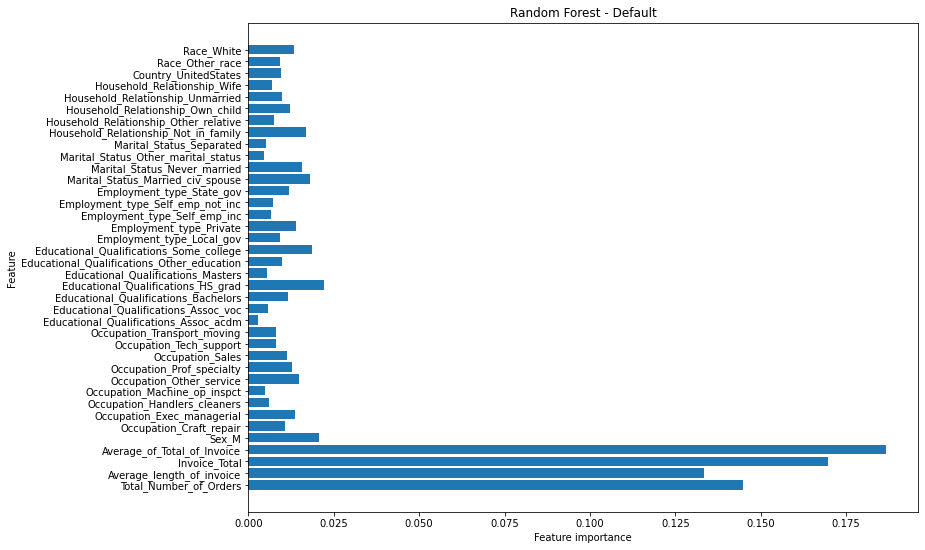

In [56]:
# Plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)
# Plot Title
plt.title(label   = "Random Forest - Default")

In [57]:
# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp),
                           'Train Test Gap'     : rf_test_gap},
                          ignore_index = True)


# Verifying the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic Regression,0.4642,0.7588,0.7607,0.0019,"(231, 0, 73, 1)"
1,Full Tree,0.5552,0.9960,0.6623,0.3337,"(176, 55, 48, 26)"
2,Pruned Tree,0.4509,0.7581,0.7508,0.0073,"(229, 2, 74, 0)"
3,Tuned LR,0.5118,0.7534,0.7475,0.0059,"(227, 4, 73, 1)"
4,KNN Classifier,0.4843,0.7566,0.7574,0.0008,"(231, 0, 74, 0)"
5,Tuned Tree,0.4824,0.7570,0.7574,0.0004,"(231, 0, 74, 0)"
6,Random Forest (Full),0.4992,0.7585,0.7574,0.0011,"(231, 0, 74, 0)"


In [58]:
# Building a model based on hyperparameter tuning results
# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 11,
                                      n_jobs           = 250,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(clients_predict_data, clients_predict_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict_proba(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY :', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY :', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score         :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred[:, 1]).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred[:, 1]).round(4) # auc
# Train-Test gap
forest_tuned_test_gap = abs(forest_tuned_train_score - forest_tuned_test_score).round(4)

print('RF Tuned Train-Test Gap        :', forest_tuned_test_gap)

Forest Tuned Training ACCURACY : 0.757
Forest Tuned Testing  ACCURACY : 0.7574
Forest Tuned AUC Score         : 0.9738
RF Tuned Train-Test Gap        : 0.0004


In [59]:
# Segregating the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred[:, 1].round(0).astype('int')).ravel()

# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 231
False Positives: 0
False Negatives: 74
True Positives : 0



Text(0.5, 1.0, 'Random Forest - Tuned')

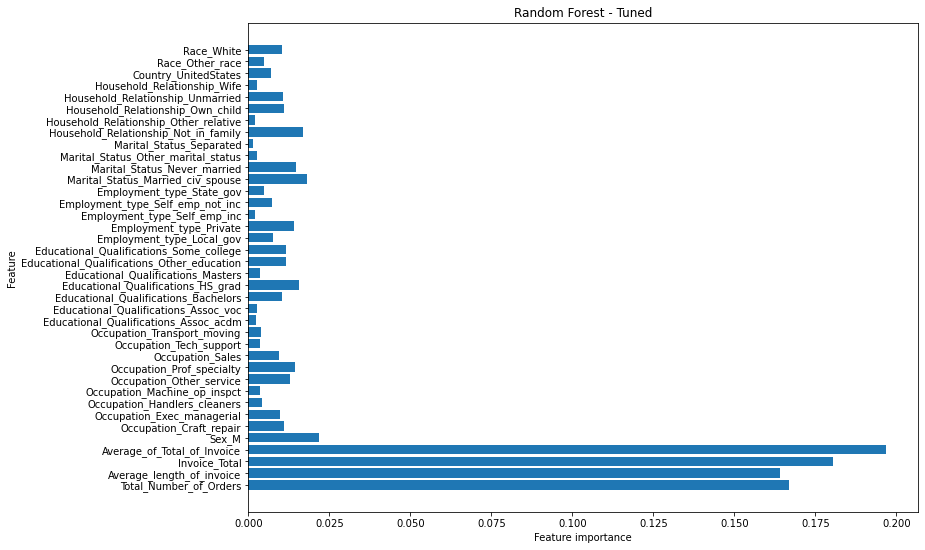

In [60]:
# Plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

# Plot Title
plt.title(label   = "Random Forest - Tuned")

In [61]:
# Declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred[:, 1]).round(4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp),
                           'Train Test Gap'     : forest_tuned_test_gap},
                          ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic Regression,0.4642,0.7588,0.7607,0.0019,"(231, 0, 73, 1)"
1,Full Tree,0.5552,0.9960,0.6623,0.3337,"(176, 55, 48, 26)"
2,Pruned Tree,0.4509,0.7581,0.7508,0.0073,"(229, 2, 74, 0)"
3,Tuned LR,0.5118,0.7534,0.7475,0.0059,"(227, 4, 73, 1)"
4,KNN Classifier,0.4843,0.7566,0.7574,0.0008,"(231, 0, 74, 0)"
5,Tuned Tree,0.4824,0.7570,0.7574,0.0004,"(231, 0, 74, 0)"
6,Random Forest (Full),0.4992,0.7585,0.7574,0.0011,"(231, 0, 74, 0)"
7,Tuned Random Forest (Full),0.9738,0.7570,0.7574,0.0004,"(231, 0, 74, 0)"


### Gradient Boosted Models

In [62]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict_proba(x_test)


# SCORING the results
print('Training ACCURACY    :', full_gbm_default_fit.score(x_train, y_train).round(decimals = 4))
print('Testing ACCURACY     :', full_gbm_default_fit.score(x_test, y_test).round(decimals = 4))
print('AUC Score            :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred[:, 1]).round(decimals = 4))

# Declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(decimals = 4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(decimals = 4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred[:, 1].round(decimals = 4))

# Train-Test gap
gbm_test_gap = abs(gbm_train_acc - gbm_test_acc).round(decimals = 4)

# Printing Train-Test gap
print('GBM Train-Test Gap   :', gbm_test_gap)

Training ACCURACY    : 0.9719
Testing ACCURACY     : 0.741
AUC Score            : 0.5082
GBM Train-Test Gap   : 0.2309


In [63]:
# Segregating the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred[:, 1].round(0).astype('int')).ravel()

# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 222
False Positives: 9
False Negatives: 70
True Positives : 4



In [64]:
# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp),
                          'Train Test Gap'    : gbm_test_gap},
                          ignore_index = True)


# Checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
0,Logistic Regression,0.464200,0.7588,0.7607,0.0019,"(231, 0, 73, 1)"
1,Full Tree,0.555200,0.9960,0.6623,0.3337,"(176, 55, 48, 26)"
2,Pruned Tree,0.450900,0.7581,0.7508,0.0073,"(229, 2, 74, 0)"
3,Tuned LR,0.511800,0.7534,0.7475,0.0059,"(227, 4, 73, 1)"
4,KNN Classifier,0.484300,0.7566,0.7574,0.0008,"(231, 0, 74, 0)"
5,Tuned Tree,0.482400,0.7570,0.7574,0.0004,"(231, 0, 74, 0)"
6,Random Forest (Full),0.499200,0.7585,0.7574,0.0011,"(231, 0, 74, 0)"
7,Tuned Random Forest (Full),0.973800,0.7570,0.7574,0.0004,"(231, 0, 74, 0)"
8,GBM (Full),0.508249,0.9719,0.7410,0.2309,"(222, 9, 70, 4)"


In [65]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 8,
                                       n_estimators  = 500,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(clients_predict_data, clients_predict_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict_proba(x_test)


# SCORING the results
print('GBM Tuned Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(decimals = 4))
print('GBM Tuned Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(decimals = 4))
print('GBM Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred[:, 1]).round(decimals = 4))

# Declaring model performance objects
gbm_tuned_train_acc = gbm_tuned_fit.score(x_train, y_train).round(decimals = 4)
gbm_tuned_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(decimals = 4)
gbm_tuned_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred[:, 1]).round(decimals = 4)

# Train-Test gap
gbm_tuned_test_gap = abs(gbm_tuned_train_acc - gbm_tuned_test_acc).round(decimals = 4)

# Printing Train-Test gap
print('GBM Tuned Train-Test Gap   :', gbm_tuned_test_gap)

GBM Tuned Training ACCURACY: 1.0
GBM Tuned Testing  ACCURACY: 1.0
GBM Tuned AUC Score        : 1.0
GBM Tuned Train-Test Gap   : 0.0


In [66]:
# Segregating the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred[:, 1].round(0).astype('int')).ravel()

# Printing each element in confusion matrix one-by-one with repective label
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 231
False Positives: 0
False Negatives: 0
True Positives : 74



In [67]:
# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_tuned_train_acc,
                          'Testing Accuracy'   : gbm_tuned_test_acc,
                          'AUC Score'          : gbm_tuned_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp),
                          'Train Test Gap'     : gbm_tuned_test_gap},
                          ignore_index = True)


# Checking & sorting the results in descending order
model_performance.sort_values(by = 'AUC Score',
                              ascending = False) 

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,Confusion Matrix
9,Tuned GBM,1.000000,1.0000,1.0000,0.0000,"(231, 0, 0, 74)"
7,Tuned Random Forest (Full),0.973800,0.7570,0.7574,0.0004,"(231, 0, 74, 0)"
1,Full Tree,0.555200,0.9960,0.6623,0.3337,"(176, 55, 48, 26)"
3,Tuned LR,0.511800,0.7534,0.7475,0.0059,"(227, 4, 73, 1)"
8,GBM (Full),0.508249,0.9719,0.7410,0.2309,"(222, 9, 70, 4)"
6,Random Forest (Full),0.499200,0.7585,0.7574,0.0011,"(231, 0, 74, 0)"
4,KNN Classifier,0.484300,0.7566,0.7574,0.0008,"(231, 0, 74, 0)"
5,Tuned Tree,0.482400,0.7570,0.7574,0.0004,"(231, 0, 74, 0)"
0,Logistic Regression,0.464200,0.7588,0.7607,0.0019,"(231, 0, 73, 1)"
2,Pruned Tree,0.450900,0.7581,0.7508,0.0073,"(229, 2, 74, 0)"


In [68]:
# Printing the final results for selected Classification Model

print(f""" 

    Selecting Tuned Logistic Regression as final model since, it was giving better AUC score with desirable 
    train-test gap.
   
      
      Logistic Regression Tuned Training ACCURACY : {lr_tuned_train_score}
      Logistic Regression Tuned Testing  ACCURACY : {lr_tuned_test_score}
      Logistic Regression Tuned Train-Test Gap    : {lrtuned_test_gap}
      Logistic Regression Tuned AUC Score         : {lr_tuned_auc}
      
    """)

 

    Selecting Tuned Logistic Regression as final model since, it was giving better AUC score with desirable 
    train-test gap.
   
      
      Logistic Regression Tuned Training ACCURACY : 0.7534
      Logistic Regression Tuned Testing  ACCURACY : 0.7475
      Logistic Regression Tuned Train-Test Gap    : 0.0059
      Logistic Regression Tuned AUC Score         : 0.5118
      
    


## Unsupervised Learning

In [69]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [70]:
# Normalizing variables before correlation analysis
clients_predict_scaled = unsupervised_scaler(df = clients_predict)

### PCA Model

In [71]:
# INSTANTIATING a PCA model
pca = PCA(n_components = 2,   # number of principal components to develop
          random_state = 219)


# FITTING and TRANSFORMING the digits data
clients_predict_pca = pca.fit_transform(clients_predict_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", clients_predict_scaled.shape)
print("PCA shape     :", clients_predict_pca.shape)

Original shape: (3050, 39)
PCA shape     : (3050, 2)


#### Data Visualization 1: Correlation Heatmap

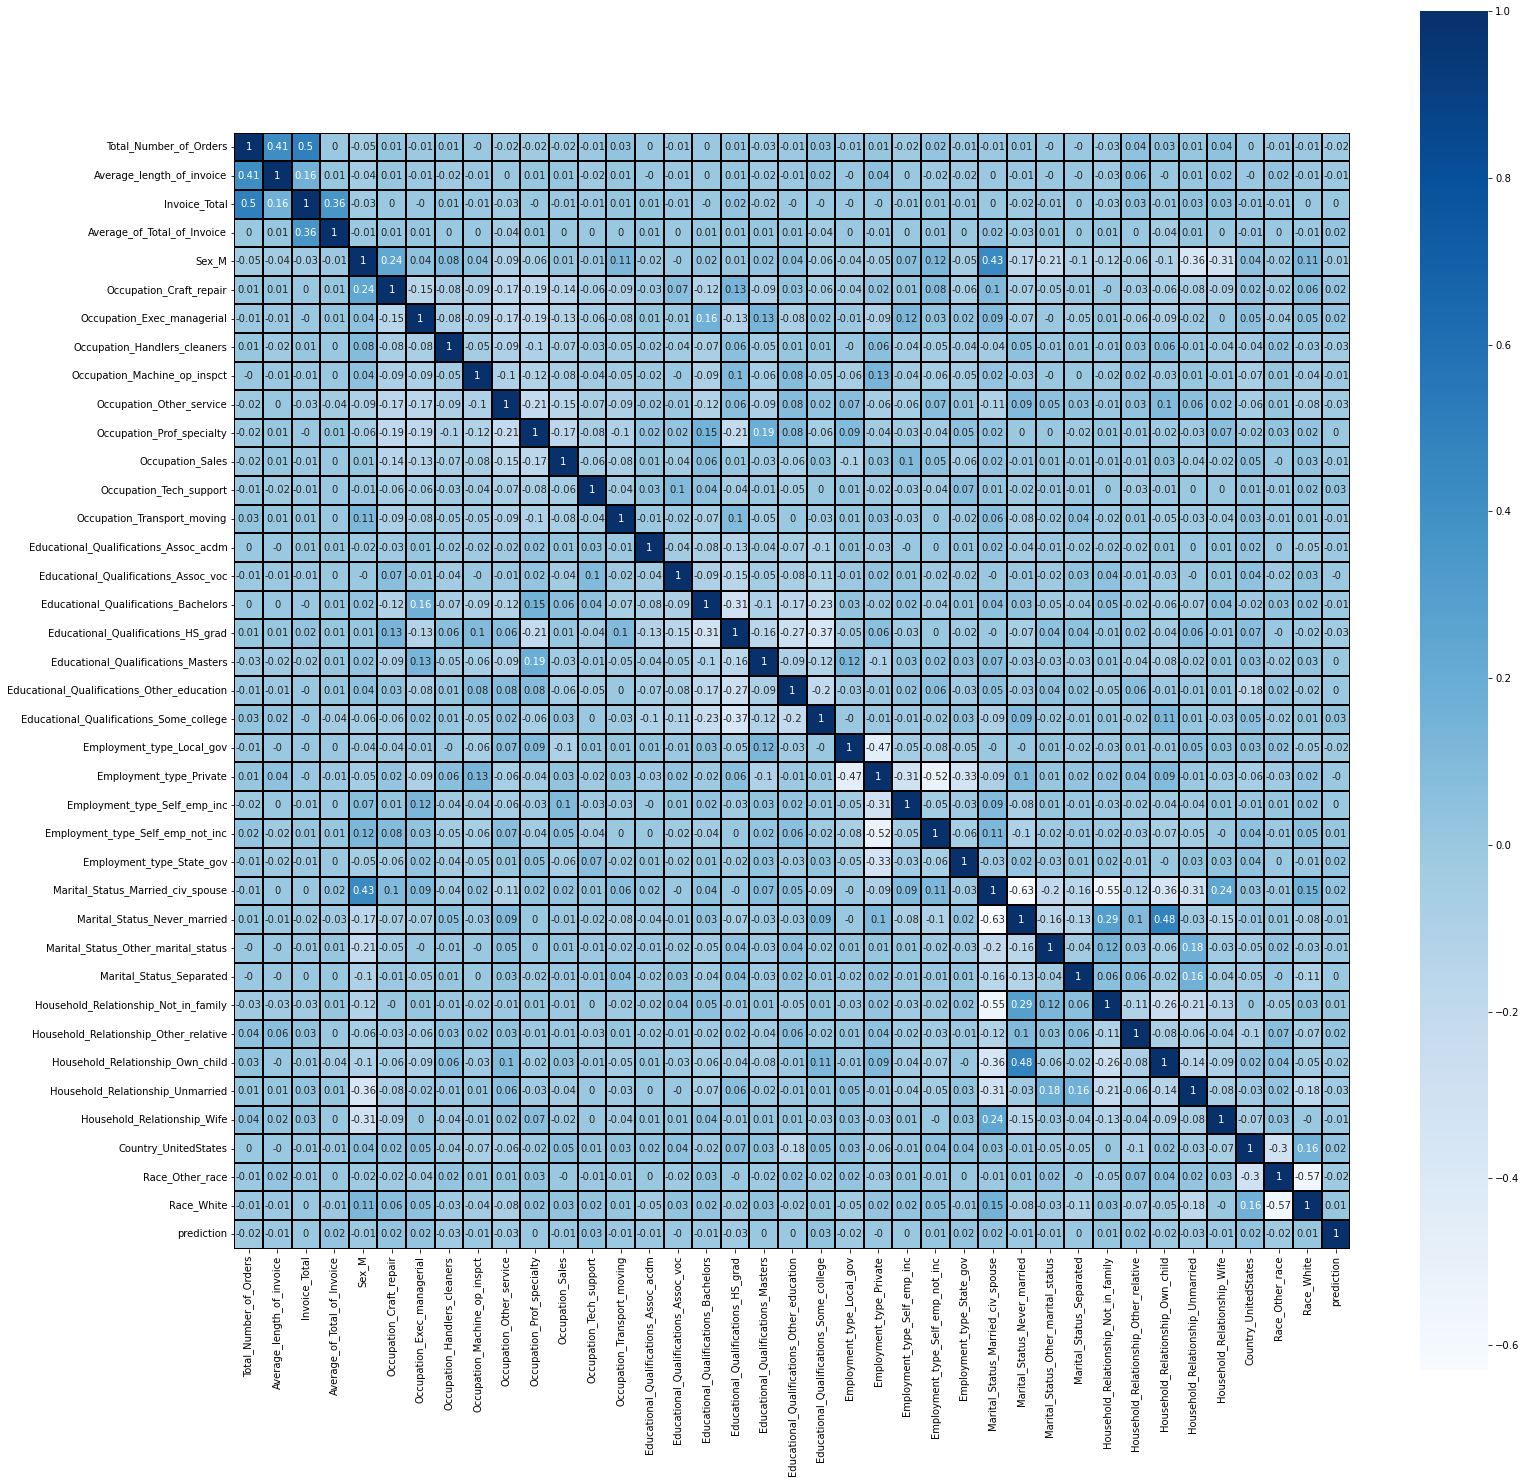

In [72]:
# Clients correlation heatmap

# Setting plot size
fig, ax = plt.subplots(figsize = (25, 25))


# Developing a correlation matrix object
df_corr = clients_predict.corr(method = 'pearson').round(decimals = 2)


# Creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            linewidths = 0.1,
            linecolor = 'black',
            annot  = True)


# Rendering the heatmap
plt.show()

Clients Correlation Heatmap:

The heatmap for the clients predication gives a lot of information and can be a lot to take in. It's useful to see all the variables in the dataset to see which variables who has high correlation between each other. 
High positive correlation: There are 4 different correlations which have a positive correlation above 0.4. 

The two variables with the highest correlation is the invoice total and total numbers of orders.  It makes sense as more numbers of orders, the more the invoice total will be which indicates more customers, the better. 
In our logistic regression model 2 which is the final logistic regression model,  we used the average of total of invoice because it was the most significant one. This shows us that the strongest correlation between variables is not one of the most important ones in the correlation matrix. 

Marital status were they have never been married and household relationship with own child is showing a positive correlation of 0.48.  The other two correlations above 0.4 is the average length of invoice with the total numbers, and when sex is male and marital status is married with civ spouse.

We also have a few moderate negative correlation in the dataset. The correlation between such as marital status married civ spouse and marital status never married has a the highest negative correlation with -0.63.

As we saw in the important features the average of total invoice, invoice total, average length of invoice and the total of numbers of order is by far the features with the most importance, which also gives some high correlation between the varibales. 

Even though some of them is showing correlation to a certain degree, it can me misleading. It's important not to mistake correlation with causation. High correlation doesn't imply causation. It is important to see which variables is the signal, and which ones are creating noice in the dataset. 

In [73]:
# Component number counter
component_number = 0


# Looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.068
PC 2: 0.051


In [74]:
# Printing the sum of all explained variance ratios
pca.explained_variance_ratio_.sum(axis= 0).round(decimals = 4)

0.1194

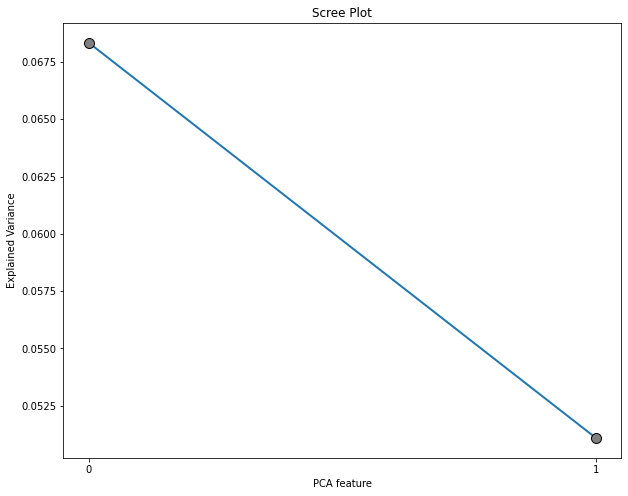

In [75]:
# Calling 'scree_plot' function
scree_plot(pca_object = pca)

In [76]:
# Transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# Naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(clients_predict_scaled.columns)


# Checking the results
print(factor_loadings_df)

                                               0     1
Total_Number_of_Orders                      0.03 -0.05
Average_length_of_invoice                   0.02 -0.05
Invoice_Total                              -0.00 -0.04
Average_of_Total_of_Invoice                -0.02 -0.00
Sex_M                                      -0.34 -0.22
Occupation_Craft_repair                    -0.13 -0.26
Occupation_Exec_managerial                 -0.12  0.18
Occupation_Handlers_cleaners                0.05 -0.12
Occupation_Machine_op_inspct                0.02 -0.19
Occupation_Other_service                    0.15  0.04
Occupation_Prof_specialty                  -0.01  0.28
Occupation_Sales                           -0.02 -0.07
Occupation_Tech_support                    -0.01  0.04
Occupation_Transport_moving                -0.06 -0.13
Educational_Qualifications_Assoc_acdm      -0.02  0.06
Educational_Qualifications_Assoc_voc       -0.01 -0.01
Educational_Qualifications_Bachelors       -0.05  0.21
Educationa

In [77]:
# Naming each principal component
factor_loadings_df.columns = [ 'Personal',
                              'Wholesaler']

In [78]:
# Converting into a DataFrame 
clients_predict_pca = pd.DataFrame(clients_predict_pca)


# Renaming columns
clients_predict_pca.columns = factor_loadings_df.columns


# Checking results
clients_predict_pca

,Personal,Wholesaler
0,-2.039984,0.172097
1,-1.134990,-0.092530
2,-1.120903,1.688645
3,1.132022,3.506021
4,-1.878257,0.309061
...,...,...
3045,0.660925,-2.065357
3046,-2.656480,1.131023
3047,1.249014,-0.599077
3048,0.766294,2.327726


#### Data Visualization 2: PCA Scree Plots

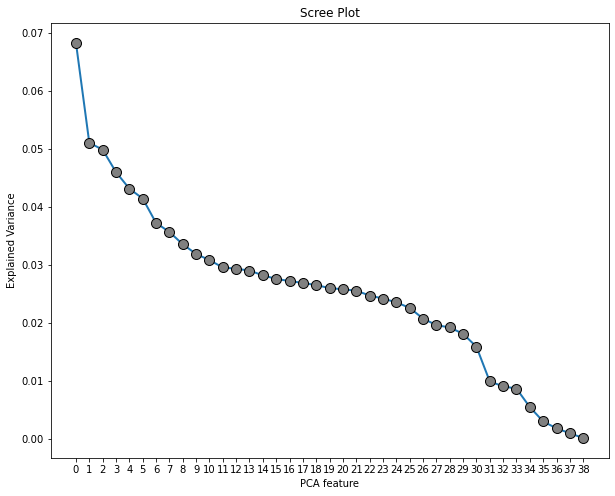

In [79]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
clients_predict_pca = pca.fit_transform(clients_predict_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

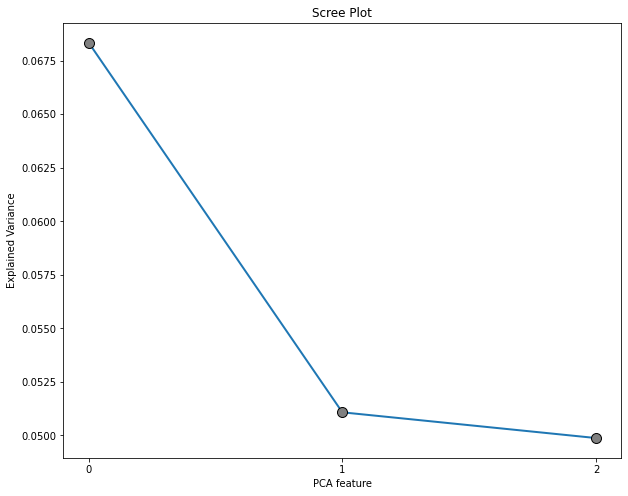

In [80]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
clients_predict_pca_3 = pca_3.fit_transform(clients_predict_scaled)
scree_plot(pca_object = pca_3)

Principal Component Analysis of the Scree Plots:

  As seen above, we have created a PCA model with no limits to its number of principal components first. Then we reduced the number of principal components to a reasonable number based on the first scree plot. Therefore we created a second model with 3 components. As you can see when comparing the two different PCA plots, the second model with 3 components (or features) have a higher standard deviation then the rest of the variables, especially the first components, as shown with the 0 on the PCA feature. The PCA model is showing that our values are moderate factor loadings, when the PCA model with 3 components has explained variance range from 0.050 to 0.0675.
    
  In a scree plot you want to keep the values above the scree, which is where the plot does not drop much or taper off gradually. We interpret the number of components above where they tend to not change much anymore. When we look to the left PCA scree plot we see that the components doesn't change much from the PCA features around 6 until 30, and then it drops more again. But if we compare the left PCA scree plot to the right PCA scree plot where we have only kept the 3 components with the highest variance, the difference between the components look bigger. We clearly see that component 1 (PCA feature 0) has a much higher variance then the other components. Component 1 has a high drop in explained variance compared to the other features in the scree plot. Still, the 3 components with the highest variance is over the scree line. Therefore we keep the 3 components as shown in the PCA scree plot above to the right. 
  
In our dendrogram we will look into how many clusters there will be to improve our model, and then final the business insights and recommendations.

In [81]:
# Max PC Model
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# Naming rows as original features
factor_loadings = factor_loadings.set_index(clients_predict_scaled.columns)


# 3 PC Model
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# Naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(clients_predict_scaled.columns)



In [82]:
# Analyzing factor strengths per customer
factor_loadings = pca_3.transform(clients_predict_scaled)


# Converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# Renaming columns
factor_loadings_df.columns = factor_loadings_3.columns


# Checking the results
factor_loadings_df.head(n = 5)

,0,1,2
0,-2.035400,0.147421,0.471164
1,-1.129184,-0.096242,-0.340913
2,-1.120580,1.648416,-0.217896
3,1.136954,3.513027,-1.602957
4,-1.874178,0.337048,-0.951261


In [83]:
# Applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df =  factor_loadings_df)


# Checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

0    2.665225
1    1.992346
2    1.945591
dtype: float64 


0    1.0
1    1.0
2    1.0
dtype: float64


In [84]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
clients_predict_pca_3 = pca_3.fit_transform(clients_predict_scaled)

#### Data Visualization 3: Dendrogram

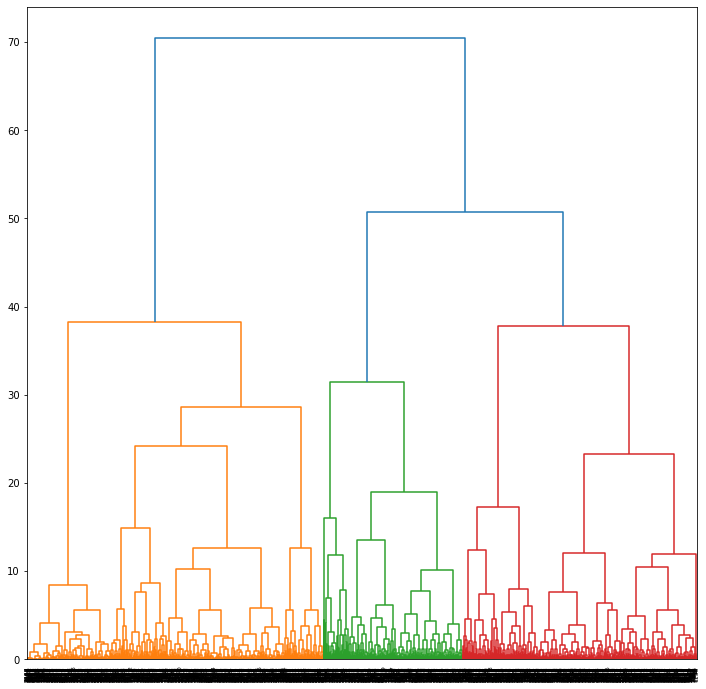

In [85]:
# Grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# Setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# Developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# Rendering the plot
plt.show()

Dendrogram: 

We need to build a dendrogram to understand how many clusters to build using k-Means. That is the goal of the model. By creating the dendrogram visualization it is easier to interpret the model and decide on which cluster to use. 

The dendrogram is showing us the summary of the distance matrix by telling us more about the similarities of the patterns in the data. There are 2 different clusters, which is then split into 3, as shown in the color orange, green and red. The two clusters we use is the personal and the wholesaler. The y-axis is the measure of the closeness of the different clusters. As we see above the dendrogram is divided at 70. The two different wards are created first at 50 for the green and red, and then at almost 40 for the first yellow. The longer the vertical lines is, the greater the difference between the branches. This indicates that there is difference in the cluster 1 and 2, as the first yellow is right under 40, while the green and red is together right above the 50 mark. There is though more similarity between the green and the red wards, but not on the same cluster level.   


The advantage to use a dendrogram is to better understand the data groupings, and help to decide the final number of cluster to develop. They can give some indication about what to cluster, but always be careful about and check that the results makes sense. The results has to make sense in both a statistics matter, but more importantly that the model can give useful insights in relation to business decisions.  We have chosen to develop 2 clusters, with the personal and the wholesaler to instantiating a k-Means. The biggest disadvantages by using dendrogram is that it's unable to predict on new data.

In [86]:
# INSTANTIATING a k-Means object with clusters
clients_predict_k_pca = KMeans(n_clusters   = 2,
                         random_state = 219)


# Fitting the object to the data
clients_predict_k_pca.fit(pca_scaled)


# Converting the clusters to a DataFrame
clients_predict_kmeans_pca = pd.DataFrame({'Cluster': clients_predict_k_pca.labels_})


# Checking the results
print(clients_predict_kmeans_pca.iloc[: , 0].value_counts())

1    1601
0    1449
Name: Cluster, dtype: int64


In [87]:
# Storing cluster centers
centroids_pca = clients_predict_k_pca.cluster_centers_


# Converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# Renaming principal components
centroids_pca_df.columns = ['Personal',
                            'Wholesaler', 'Unknown']


# Checking results (clusters = rows, pc = columns)
centroids_pca_df

,Personal,Wholesaler,Unknown
0,-0.94,-0.10,0.19
1,0.85,0.09,-0.17


# Conclusion

To summarize, the classification model used in this analysis needs improvement by analysing and adding some elements which are missing in the dataset which would be contributing in prediction model. Furthermore, next steps can include the inclusion of missing elements in classification model and to re-verify the dataset. It would be really helpful if Flora can explain us the data and its collection method which can help to build better models in the future. In future, the data collection and storing method needs to be scrutinized for predicting or classifying the customers appropriately.